In [4]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# load the dataset
df=pd.read_csv("heart_disease_dataset.csv")

In [7]:
# print 1st 5 rows
df.head(5)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,67,1,0,176,148,1,1,168,1,5.6,2,1,0,0
1,57,1,1,155,551,0,1,98,1,4.2,1,3,1,1
2,43,1,0,125,519,1,0,113,1,0.8,0,0,0,1
3,71,1,0,123,285,0,2,156,0,6.2,2,0,1,0
4,36,0,0,122,488,1,1,87,1,3.3,2,2,2,0


In [8]:
#print shape of data
df.shape

(500, 14)

Description of each column:(14 features)

1] Age: Age of the patient in years.

2] Sex: Gender of the patient (1 = male; 0 = female).

3] ChestPain: Type of chest pain experienced, categorized as:

0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic

4] RestBP: Resting blood pressure in mm Hg upon hospital admission.

5] Chol: Serum cholesterol level in mg/dL.

6] Fbs: Fasting blood sugar > 120 mg/dL (1 = true; 0 = false).

7] RestECG: Resting electrocardiographic results, with values:

0: Normal
1: Having ST-T wave abnormality
2: Showing probable or definite left ventricular hypertrophy

8] MaxHR: Maximum heart rate achieved during exercise.

9] ExAng: Exercise-induced angina (1 = yes; 0 = no).

10] Oldpeak: ST depression induced by exercise relative to rest.

11] Slope: Slope of the peak exercise ST segment, categorized as:

0: Upsloping
1: Flat
2: Downsloping

12] Ca: Number of major vessels (0-3) colored by fluoroscopy.

13] Thal: Thalassemia status, with values:

0: Normal
1: Fixed defect
2: Reversible defect

14] AHD: Presence of heart disease (1 = yes; 0 = no).

In [9]:
# print information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        500 non-null    int64  
 1   Sex        500 non-null    int64  
 2   ChestPain  500 non-null    int64  
 3   RestBP     500 non-null    int64  
 4   Chol       500 non-null    int64  
 5   Fbs        500 non-null    int64  
 6   RestECG    500 non-null    int64  
 7   MaxHR      500 non-null    int64  
 8   ExAng      500 non-null    int64  
 9   Oldpeak    500 non-null    float64
 10  Slope      500 non-null    int64  
 11  Ca         500 non-null    int64  
 12  Thal       500 non-null    int64  
 13  AHD        500 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 54.8 KB


In [10]:
# description of dataset
df.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,52.980000,0.468000,1.44600,145.80200,349.134000,0.522000,0.960000,137.414000,0.510000,3.183000,1.070000,1.514000,1.054000,0.504000
std,13.800598,0.499475,1.09795,30.52058,130.505891,0.500016,0.817151,38.168472,0.500401,1.763823,0.811429,1.133302,0.815115,0.500485
min,29.000000,0.000000,0.00000,94.00000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.00000,119.00000,240.500000,0.000000,0.000000,105.000000,0.000000,1.700000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,1.00000,146.00000,351.500000,1.000000,1.000000,138.000000,1.000000,3.200000,1.000000,2.000000,1.000000,1.000000
75%,64.000000,1.000000,2.00000,174.00000,463.500000,1.000000,2.000000,171.000000,1.000000,4.725000,2.000000,3.000000,2.000000,1.000000
max,76.000000,1.000000,3.00000,199.00000,563.000000,1.000000,2.000000,201.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [11]:
#check the null values 
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In this dataset we can see that only 2 columns i.e. Ca, Thal are contain null values 

In [12]:
# "Ca" is the numbrical column so replace missing values by mean value
df["Ca"].fillna(df["Ca"].mean,inplace=True)

In [13]:
#"Thal" is the categorical column so replace it's missing values by mode
df["Thal"] = df["Thal"].fillna(df["Thal"].mode()[0])

In [14]:
#verify the missing values are filled ?
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

# Operation 1
-----Standard derivation, variance calculation for every numberical column-----

In [15]:
print(df.dtypes)

Age            int64
Sex            int64
ChestPain      int64
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca             int64
Thal           int64
AHD            int64
dtype: object


------------Variance and Standard derivation of Age column---------------

In [16]:
#step 1: calculate mean val
mean_val=sum(df["Age"]/len(df["Age"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["Age"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_Age = sum(squared_diff) / (len(df["Age"]) - 1)
# step 4: take square root to get std dev
std_dev_Age=np.sqrt(variance_Age)
print("Variance of Age column: ",variance_Age)
print("Standard derivation of Age column: ",std_dev_Age)

Variance of Age column:  190.4565130260521
Standard derivation of Age column:  13.800598285076344


------------Variance and Standard derivation of Chol column---------------

In [17]:
#step 1: calculate mean val
mean_val=sum(df["Chol"]/len(df["Chol"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["Chol"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_Chol = sum(squared_diff) / (len(df["Chol"]) - 1)
# step 4: take square root to get std dev
std_dev_Chol=np.sqrt(variance_Chol)
print("Variance of Chol column: ",variance_Chol)
print("Standard derivation of Chol column: ",std_dev_Chol)

Variance of Chol column:  17031.787619238476
Standard derivation of Chol column:  130.50589112847925


------------Variance and Standard derivation of RestBP column---------------

In [18]:
#step 1: calculate mean val
mean_val=sum(df["RestBP"]/len(df["RestBP"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["RestBP"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_RestBP = sum(squared_diff) / (len(df["RestBP"]) - 1)
# step 4: take square root to get std dev
std_dev_RestBP=np.sqrt(variance_RestBP)
print("Variance of RestBP column: ",variance_RestBP)
print("Standard derivation of RestBP column: ",std_dev_RestBP)

Variance of RestBP column:  931.5058076152304
Standard derivation of RestBP column:  30.520580066820983


------------Variance and Standard derivation of MaxHR column---------------

In [19]:
#step 1: calculate mean val
mean_val=sum(df["MaxHR"]/len(df["MaxHR"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["MaxHR"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_MaxHR = sum(squared_diff) / (len(df["MaxHR"]) - 1)
# step 4: take square root to get std dev
std_dev_MaxHR=np.sqrt(variance_MaxHR)
print("Variance of RestBP column: ",variance_MaxHR)
print("Standard derivation of RestBP column: ",std_dev_MaxHR)

Variance of RestBP column:  1456.8322685370742
Standard derivation of RestBP column:  38.16847217975949


------------Variance and Standard derivation of Oldpeak column---------------

In [20]:
#step 1: calculate mean val
mean_val=sum(df["Oldpeak"]/len(df["Oldpeak"]))
#step 2: calculate the squared differences
squared_diff=[(x-mean_val)**2 for x in df["Oldpeak"]]
# Step 3: Calculate variance (divide by n-1 for sample std deviation)
variance_Oldpeak = sum(squared_diff) / (len(df["Oldpeak"]) - 1)
# step 4: take square root to get std dev
std_dev_Oldpeak=np.sqrt(variance_Oldpeak)
print("Variance of Oldpeak column: ",variance_Oldpeak)
print("Standard derivation of Oldpeak column: ",std_dev_Oldpeak)

Variance of Oldpeak column:  3.1110731462925854
Standard derivation of Oldpeak column:  1.763823445329091


C:\Users\Aditya\AppData\Local\Temp\ipykernel_10272\765313345.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette="Blues")


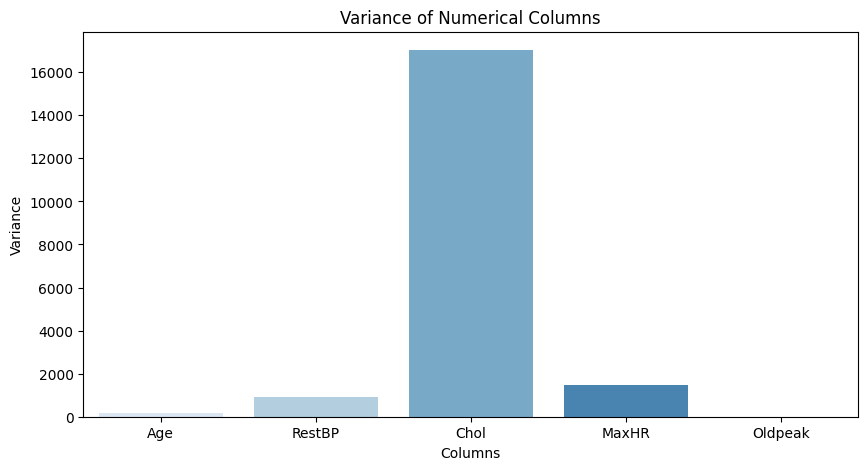

C:\Users\Aditya\AppData\Local\Temp\ipykernel_10272\765313345.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=std_dev_values.index, y=std_dev_values.values, palette="Greens")


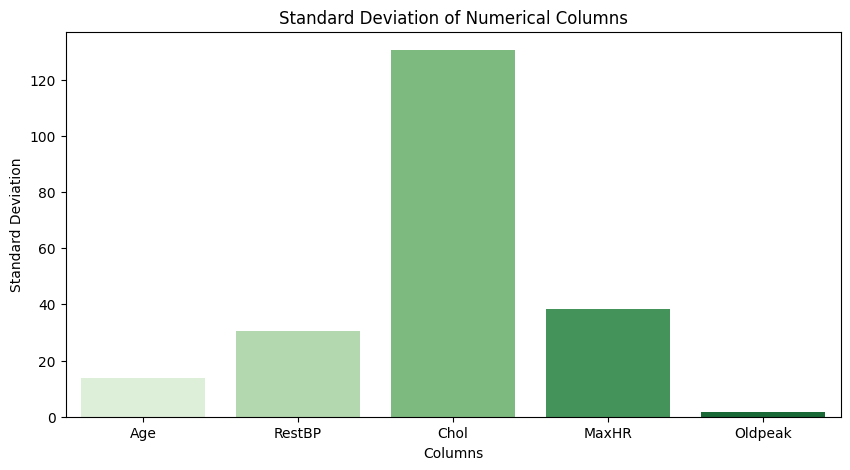

In [21]:
# Compute variance and standard deviation
variance_values = df[["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]].var()
std_dev_values = df[["Age", "RestBP", "Chol", "MaxHR", "Oldpeak"]].std()

# Create a bar plot for variance
plt.figure(figsize=(10, 5))
sns.barplot(x=variance_values.index, y=variance_values.values, palette="Blues")
plt.xlabel("Columns")
plt.ylabel("Variance")
plt.title("Variance of Numerical Columns")
plt.show()

# Create a bar plot for standard deviation
plt.figure(figsize=(10, 5))
sns.barplot(x=std_dev_values.index, y=std_dev_values.values, palette="Greens")
plt.xlabel("Columns")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Numerical Columns")
plt.show()

# Operation 2
-----Find covarience and perform correlation analysis using correlation coeficient-----

In [22]:

##### Covariance and correlation analysis of Age Vs MaxHR #####


#select 2 numbrical column -- Age, MaxHR and drop NaN values
x=df["Age"].dropna().values
y=df["MaxHR"].dropna().values
#step 1: compute mean of x and y
mean_x=sum(x)/len(x)
mean_y=sum(y)/len(y)

#step 2: compute covariance
covariance_AgeVsMaxBP=sum((x-mean_x)*(y-mean_y))/(len(x)-1)

#step 3: compute standard derivation
std_x=(sum((x-mean_x)**2)/(len(x)-1))**0.5
std_y=(sum((y-mean_y)**2)/(len(x)-1))**0.5

#step 4: compute correlation coeficient
correlation_AgeVsMaxBP=covariance_AgeVsMaxBP/(std_x * std_y)

print("Covariance between Age and MaxBP: ",covariance_AgeVsMaxBP)
print("Correlation coeficient between Age and MaxBP: ",correlation_AgeVsMaxBP)

Covariance between Age and MaxBP:  -16.562845691382755
Correlation coeficient between Age and MaxBP:  -0.031443600162844434


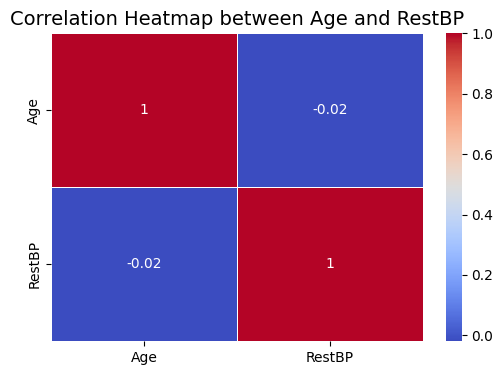

In [26]:
# Compute correlation matrix
correlation_matrix = df[["Age", "RestBP"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap="coolwarm")

plt.title("Correlation Heatmap between Age and RestBP", fontsize=14)
plt.show()

Observation: 

Covariance is -81.42 the negative value indicates an inverse relationship 

Correlation coefficient is -0.39 

# Operation 3
-----Identify independent features and unwanted features-----

In [27]:
# 1st find highly correlated features 
threshold=0.8
high_corr_features=set()
for i in range(len(correlation_matrix.columns)):#iterates over the upper triangle of the correlation matrix 
    for j in range(i):   #avoid duplicate pairs
        if abs(correlation_matrix.iloc[i,j])>threshold:
            col_name=correlation_matrix.columns[i]
            high_corr_features.add(col_name)
print("Strongly correlated featues are: ",high_corr_features)

# if there is strongly correlated features(i.e. unwanted features) then drop it
reduced_features=df.drop(columns=high_corr_features)

Strongly correlated featues are:  set()


# Operation 4
-----Data discretization using equi frequency binning method on age attribute-----

In [28]:
k=3  #no. of bins

# perform equi-frequency binning into 3 bins
df["Age_binned"]=pd.qcut(df["Age"],q=3,labels=["Young","Middle-Age","Elder"])
#print the bins 
print(df["Age_binned"])

0           Elder
1      Middle-Age
2           Young
3           Elder
4           Young
          ...    
495    Middle-Age
496    Middle-Age
497         Young
498         Young
499         Elder
Name: Age_binned, Length: 500, dtype: category
Categories (3, object): ['Young' < 'Middle-Age' < 'Elder']


<Axes: xlabel='Age', ylabel='Count'>

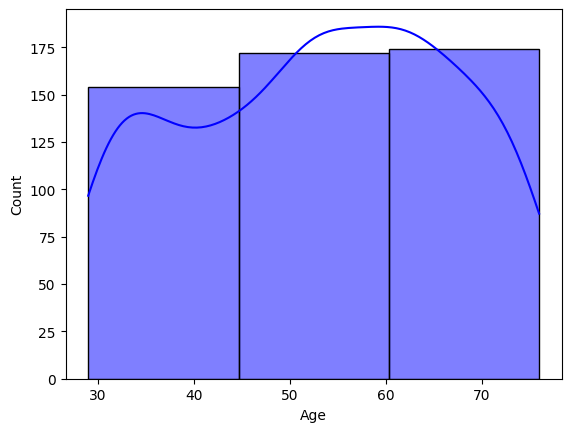

In [29]:
# visualize bins using histogram
sns.histplot(df['Age'], bins=k, kde=True,color="blue")

# Operation 5
-----Data Normalization 

using: min-max normalization, Z-score normalization, decimal scaling normalization----- 

In [30]:
# Min-Max normalization ---> scales values between 0 and 1. Best for bounded values

# Min-Max for Rest blood presserl (RestBP)
df["RestBP_MinMax"]=(df["RestBP"]-df["RestBP"].min())/(df["RestBP"].max()-df["RestBP"].min())
print(df["RestBP_MinMax"])

0      0.780952
1      0.580952
2      0.295238
3      0.276190
4      0.266667
         ...   
495    0.057143
496    0.038095
497    0.419048
498    0.542857
499    0.285714
Name: RestBP_MinMax, Length: 500, dtype: float64


In [31]:
# Min-Max for Cholestrol(Chol)
df["Chol_MinMax"]=(df["Chol"]-df["Chol"].min())/(df["Chol"].max()-df["Chol"].min())
print(df["Chol_MinMax"])

0      0.050343
1      0.972540
2      0.899314
3      0.363844
4      0.828375
         ...   
495    0.258581
496    0.329519
497    0.057208
498    0.308924
499    0.691076
Name: Chol_MinMax, Length: 500, dtype: float64


In [32]:
# Min-Max for MaxHR
df["MaxHR_MinMax"]=(df["MaxHR"]-df["MaxHR"].min())/(df["MaxHR"].max()-df["MaxHR"].min())
print(df["MaxHR"])

0      168
1       98
2      113
3      156
4       87
      ... 
495    105
496    100
497    127
498    117
499     89
Name: MaxHR, Length: 500, dtype: int64


In [33]:
# Z-score normalization ---> scales values with mean=0 and standard deviation=1

# Z-score for Rest blood presser (RestBP)
df["RestBP_ZScore"] = (df["RestBP"] - df["RestBP"].mean()) / df["RestBP"].std()
print(df["RestBP_ZScore"])

0      0.989431
1      0.301370
2     -0.681573
3     -0.747102
4     -0.779867
         ...   
495   -1.500692
496   -1.566222
497   -0.255631
498    0.170311
499   -0.714338
Name: RestBP_ZScore, Length: 500, dtype: float64


In [34]:
# Z-score for Cholestrol
df["Chol_ZScore"] = (df["Chol"] - df["Chol"].mean()) / df["Chol"].std()
print(df["Chol_ZScore"])

0     -1.541187
1      1.546796
2      1.301596
3     -0.491426
4      1.064059
         ...   
495   -0.843901
496   -0.606363
497   -1.518200
498   -0.675326
499    0.604310
Name: Chol_ZScore, Length: 500, dtype: float64


In [35]:
#Z-score for MaxHR
df["MaxHR_ZScore"] = (df["MaxHR"] - df["MaxHR"].mean()) / df["MaxHR"].std()
print(df["MaxHR_ZScore"])

0      0.801342
1     -1.032632
2     -0.639638
3      0.486946
4     -1.320828
         ...   
495   -0.849235
496   -0.980233
497   -0.272843
498   -0.534839
499   -1.268429
Name: MaxHR_ZScore, Length: 500, dtype: float64


In [36]:
# Decimal scaling normalization ---> scales values by moving the decimal point based on the maximum absolute value
# Formula--> x'=x/10^j  where j is the no. of digit in Xmax

# Decimal scaling for Rest blood presser (RestBP)
j_RestBP=len(str(abs(df["RestBP"].max())))
df["RestBP_decimal"]=df["RestBP"]/(10**j_RestBP)
print(df["RestBP_decimal"])

0      0.176
1      0.155
2      0.125
3      0.123
4      0.122
       ...  
495    0.100
496    0.098
497    0.138
498    0.151
499    0.124
Name: RestBP_decimal, Length: 500, dtype: float64


In [37]:
# Decimal scaling for Caholestrol (Chol)
j_Chol=len(str(abs(df["Chol"].max())))
df["Chol_decimal"]=df["Chol"]/(10**j_Chol)
print(df["Chol_decimal"])

0      0.148
1      0.551
2      0.519
3      0.285
4      0.488
       ...  
495    0.239
496    0.270
497    0.151
498    0.261
499    0.428
Name: Chol_decimal, Length: 500, dtype: float64


In [38]:
# Decimal scaling for MaxHR
j_MaxHR=len(str(abs(df["MaxHR"].max())))
df["MaxHR_decimal"]=df["MaxHR"]/(10**j_MaxHR)
print(df["MaxHR_decimal"])

0      0.168
1      0.098
2      0.113
3      0.156
4      0.087
       ...  
495    0.105
496    0.100
497    0.127
498    0.117
499    0.089
Name: MaxHR_decimal, Length: 500, dtype: float64


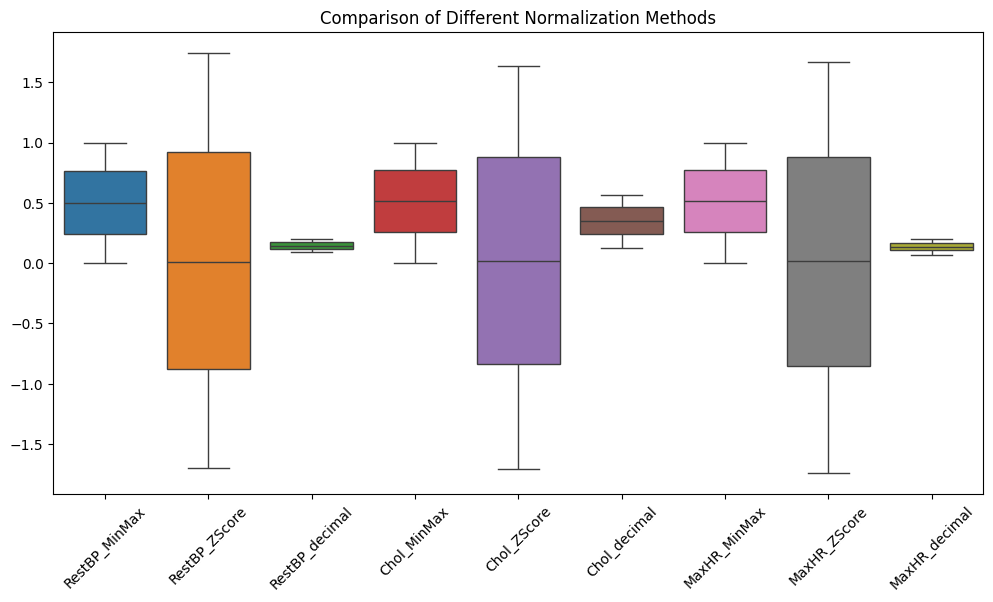

In [39]:
# Create a DataFrame with all normalization methods
normalized_data = df[["RestBP_MinMax", "RestBP_ZScore", "RestBP_decimal",
                      "Chol_MinMax", "Chol_ZScore", "Chol_decimal",
                      "MaxHR_MinMax", "MaxHR_ZScore", "MaxHR_decimal"]]

# Plot box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=normalized_data)
plt.xticks(rotation=45)
plt.title("Comparison of Different Normalization Methods")
plt.show()


Final Observation :
    
    Min-Max Scaling is ideal if all features need to be within the same 
    scale (e.g., neural networks).
    
    Z-Score Normalization is useful for detecting outliers in attributes 
    like Chol and MaxHR.


# Final Conclusion:

Feature selection and normalization improved data quality for machine learning models.

Strong correlations were identified and redundant features were dropped to avoid multicollinearity.

Heart rate tends to decline with age, confirming medical insights about cardiovascular health.

The dataset indicates that individuals aged 50-60 are at higher risk, making it a key target group for healthcare interventions.